In [267]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
#from scipy.fftpack import fft
#
#import scipy
import scipy.fft
from scipy import signal
import numpy as np
import os

%matplotlib inline

In [268]:
#this function searches for a specific value in a list and outputs the index of the element matching best

def find_freq(list, freq):
    list=np.array(list)
    dif_list=list-freq
    dif_list=np.abs(dif_list)
    index=np.argmin(dif_list)
    return index

In [269]:
rate, data = wav.read('test_clean_signal.wav')

In [270]:
#get number of sample points

N = data.shape[0]

#get spacing of the sample

T = 1.0 / rate

#check whether the audio file is stereo or mono. Remove one channel if stereo.
if(len(data.shape)>1):
    y=data[:, 0]
else:
    y=data

In [271]:
f, t, z=scipy.signal.stft(y, rate, axis=1, nperseg=50000)

In [272]:
xf=f
yf=z[3]

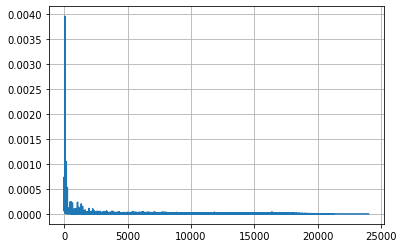

In [273]:
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))
plt.grid()

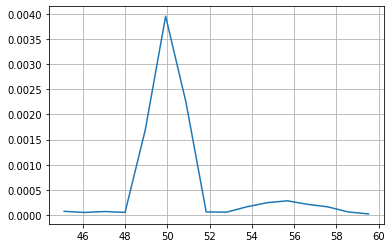

In [274]:
#this slices a specific frequency range out of the data

a=find_freq(xf, 45)
b=find_freq(xf, 60)
xf_slice=xf[a:b]
yf_slice=yf[a:b]

#plot it again
plt.plot(xf_slice[:N//2], 2.0/N * np.abs(yf_slice[:N//2]))
plt.grid()